In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14

In [4]:
ic=pd.read_csv('ICICIBANK.csv')
ic.head()

,Date,open,high,low,close,volume
0,2004-06-23,45.84,47.27,45.82,46.10,10997496
1,2004-06-24,45.82,47.96,43.87,46.21,12604239
2,2004-06-25,46.55,46.55,44.95,45.56,7008808
3,2004-06-28,45.91,46.36,44.64,45.98,7126519
4,2004-06-29,45.83,46.25,44.67,45.24,4857203


In [5]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 6 columns):
Date      3613 non-null object
open      3613 non-null float64
high      3613 non-null float64
low       3613 non-null float64
close     3613 non-null float64
volume    3613 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 169.4+ KB


In [12]:
ic=pd.read_csv('ICICIBANK.csv', parse_dates=True, index_col='Date')
ic.head()

,open,high,low,close,volume
Date,,,,,
2004-06-23,45.84,47.27,45.82,46.10,10997496
2004-06-24,45.82,47.96,43.87,46.21,12604239
2004-06-25,46.55,46.55,44.95,45.56,7008808
2004-06-28,45.91,46.36,44.64,45.98,7126519
2004-06-29,45.83,46.25,44.67,45.24,4857203


In [13]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3613 entries, 2004-06-23 to 2019-01-31
Data columns (total 5 columns):
open      3613 non-null float64
high      3613 non-null float64
low       3613 non-null float64
close     3613 non-null float64
volume    3613 non-null int64
dtypes: float64(4), int64(1)
memory usage: 169.4 KB


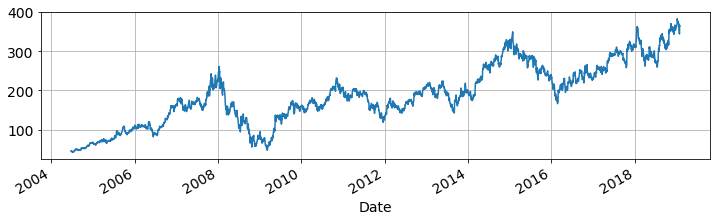

In [14]:
ic.close.plot()
plt.show()

In [30]:
ic.loc[ic.index.month == 1].head()

,open,high,low,close,volume
Date,,,,,
2005-01-03,68.18,68.18,67.30,67.52,2267418
2005-01-04,67.55,68.55,66.93,67.98,2077156
2005-01-05,68.20,68.91,62.74,65.77,4766337
2005-01-06,65.45,65.89,63.82,64.25,3660210
2005-01-07,63.64,65.81,63.64,65.22,1519687


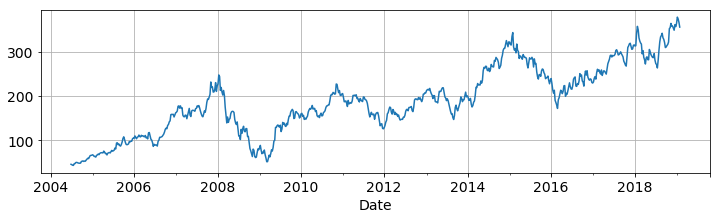

In [34]:
ic_resampled  = ic.close.resample('W').mean()
ic_resampled.plot()
plt.show()

In [35]:
ic_resampled.head()

Date
2004-06-27    45.956667
2004-07-04    45.048000
2004-07-11    43.834000
2004-07-18    43.496000
2004-07-25    47.314000
Freq: W-SUN, Name: close, dtype: float64

In [33]:
ic['roll_mean'] = ic.close.rolling(7).mean()
ic.loc[:, ['close', 'roll_mean']].head(10)

,close,roll_mean
Date,,
2004-06-23,46.10,NaN
2004-06-24,46.21,NaN
2004-06-25,45.56,NaN
2004-06-28,45.98,NaN
2004-06-29,45.24,NaN
2004-06-30,44.45,NaN
2004-07-01,45.05,45.512857
2004-07-02,44.52,45.287143
2004-07-05,42.79,44.798571


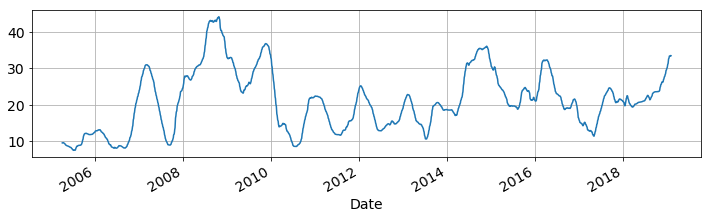

In [37]:
ic.close.rolling(200).std().plot()

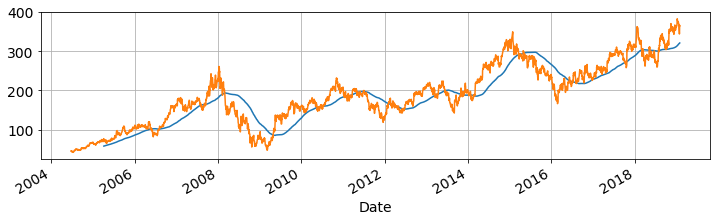

In [36]:
ic_rolling  = ic.close.rolling(200).mean()
ic_rolling.plot()
ic.close.plot()
plt.show()

## Test for Stationarity
#### Null hypothesis of the dickey fuller test is that the value is Non-stationary and so we reject thenull hypothesis if the p values is less than 0.05

In [38]:
from statsmodels.tsa.stattools import adfuller

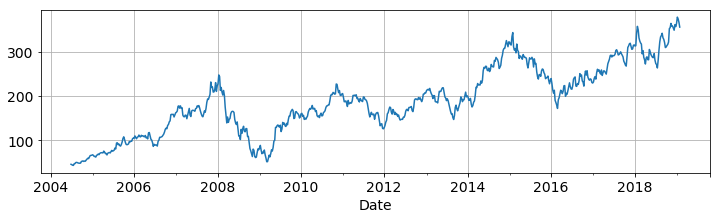

In [43]:
ic_resampled.plot()
plt.show()

In [47]:
adfuller?

### Converting non stationary to stationary
* diff(), sometimes multiple times
* log
* sqrt
* df.shift(1)/df: Proportional
* __Often simple solution(diff) is the best one__

In [48]:
ic_resampled.head()

Date
2004-06-27    45.956667
2004-07-04    45.048000
2004-07-11    43.834000
2004-07-18    43.496000
2004-07-25    47.314000
Freq: W-SUN, Name: close, dtype: float64

In [49]:
ic_resampled.diff().head()

Date
2004-06-27         NaN
2004-07-04   -0.908667
2004-07-11   -1.214000
2004-07-18   -0.338000
2004-07-25    3.818000
Freq: W-SUN, Name: close, dtype: float64

In [50]:
ic_resampled.diff().diff().head()

Date
2004-06-27         NaN
2004-07-04         NaN
2004-07-11   -0.305333
2004-07-18    0.876000
2004-07-25    4.156000
Freq: W-SUN, Name: close, dtype: float64

### Remember Dickey fuller tests only Trend stationarity. So visualisation is not replacable

In [51]:
adfuller(ic_resampled.diff().dropna())[1]

0.0

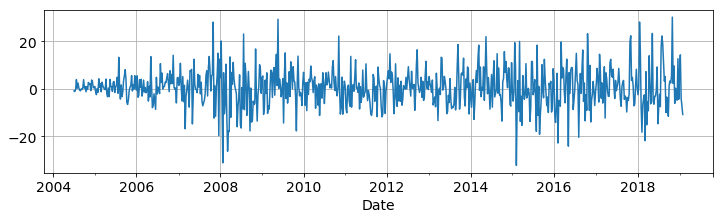

In [52]:
ic_resampled.diff().dropna().plot()
plt.show()

In [53]:
adfuller(np.log(ic_resampled))[1]

0.12832778257580535

In [54]:
adfuller(np.sqrt(ic_resampled))[1]

0.36292931806266915

In [55]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    plt.grid(True)
    orig = plt.plot(timeseries, color='tab:blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

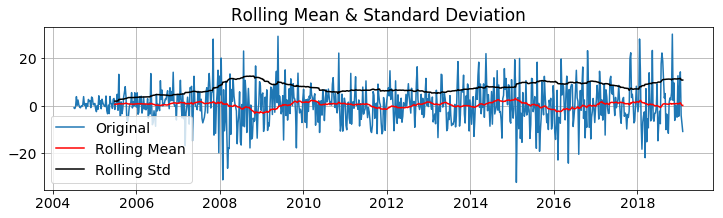

Results of Dickey-Fuller Test:
p_value:  0.0


In [56]:
test_stationarity(ic_resampled.diff().dropna())

In [57]:
pas=pd.read_csv('SeaPlaneTravel.csv', parse_dates=True, index_col='Month')
pas.columns=['Passengers']
pas.head()

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


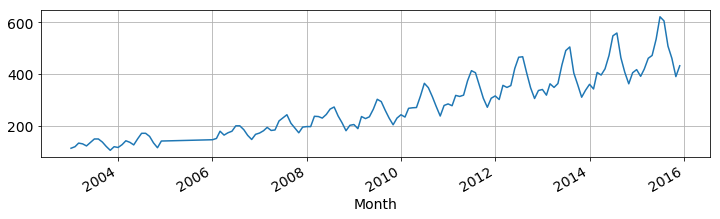

In [58]:
pas.Passengers.plot()
plt.show()

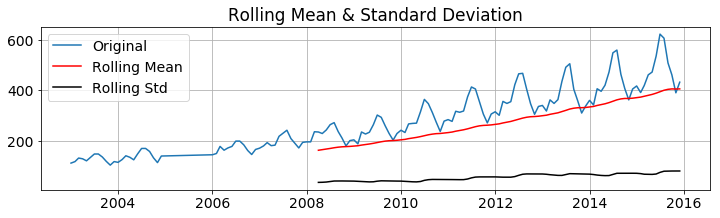

Results of Dickey-Fuller Test:
p_value:  0.9918802434376409


In [59]:
test_stationarity(pas.Passengers)

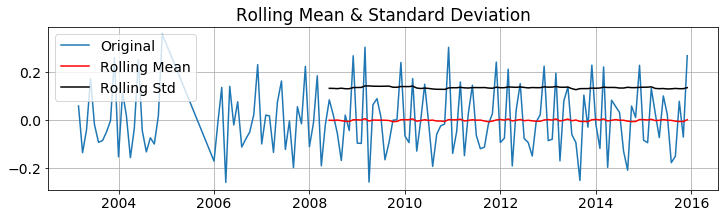

Results of Dickey-Fuller Test:
p_value:  7.419304549377529e-13


In [66]:
test_stationarity(np.log(pas.Passengers).diff().diff().dropna())

In [1]:
#Autocorrelation

In [70]:
A_corr = pd.DataFrame(ic_resampled.copy())

In [71]:
A_corr.head()

,close
Date,
2004-06-27,45.956667
2004-07-04,45.048000
2004-07-11,43.834000
2004-07-18,43.496000
2004-07-25,47.314000


In [82]:
A_corr['lag1'] = A_corr.close.shift(1)
A_corr['lag2'] = A_corr.close.shift(2)
A_corr['lag3'] = A_corr.close.shift(3)
A_corr.head(10)

,close,lag1,lag2,lag3
Date,,,,
2004-06-27,45.956667,NaN,NaN,NaN
2004-07-04,45.048000,45.956667,NaN,NaN
2004-07-11,43.834000,45.048000,45.956667,NaN
2004-07-18,43.496000,43.834000,45.048000,45.956667
2004-07-25,47.314000,43.496000,43.834000,45.048000
2004-08-01,47.516000,47.314000,43.496000,43.834000
2004-08-08,49.892000,47.516000,47.314000,43.496000
2004-08-15,50.250000,49.892000,47.516000,47.314000
2004-08-22,49.692000,50.250000,49.892000,47.516000


In [81]:
adfuller?

In [80]:
A_corr.dropna().corr()

,close,lag1,lag2,lag3
close,1.000000,0.994552,0.988000,0.981546
lag1,0.994552,1.000000,0.994555,0.988014
lag2,0.988000,0.994555,1.000000,0.994547
lag3,0.981546,0.988014,0.994547,1.000000


In [86]:
A_corr.close.autocorr(3)

0.9815458522702122

## ARMA models
* __Requires the data to be Stationary__

### Auto Regressive AR Model

__AR(1)__

### \begin{equation*}P(today) = Mean  +  Coeff*P(yesterday) + Noise \end{equation*}
### \begin{equation*}P(t) = \mu + \gamma1*P(t-1) + \epsilon \end{equation*}

* __If gamma_1 = 0 model is Mean plus noise__

__AR(2)__

### \begin{equation*}P(t) = \mu + \gamma1*P(t-1) +  \gamma2*P(t-2) + \epsilon \end{equation*}

### Moving Average MA Model

MA(1) Model

### \begin{equation*}P(t) = \mu + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}

MA(2) Model

### \begin{equation*}P(t) = \mu + \theta2*\epsilon(t-2) + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}


### ARMA Model

#### ARMA(1,1)

### \begin{equation*}P(t) = \mu +  \gamma1*P(t-1) + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}

#### ARMA(1,2)

### \begin{equation*}P(t) = \mu +  \gamma1*P(t-1) + \theta1*\epsilon(t-1) + \theta2*\epsilon(t-2)+ \epsilon(t) \end{equation*}

#### ARMA(2,1)

### \begin{equation*}P(t) = \mu +  \gamma1*P(t-1) +  \gamma1*P(t-2)+ \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}


#### ARMA(2,2)

### \begin{equation*}P(t) = \mu +  \gamma1*P(t-1) +  \gamma1*P(t-2)+ \theta1*\epsilon(t-1) + \theta2*\epsilon(t-2)+ \epsilon(t) \end{equation*}

In [ ]:
ic_resampled.diff().dropna().autocorr(2)

# ACF- PACF to determine lags the model (AR, MA, ARMA) and lags(p and q)

In [88]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

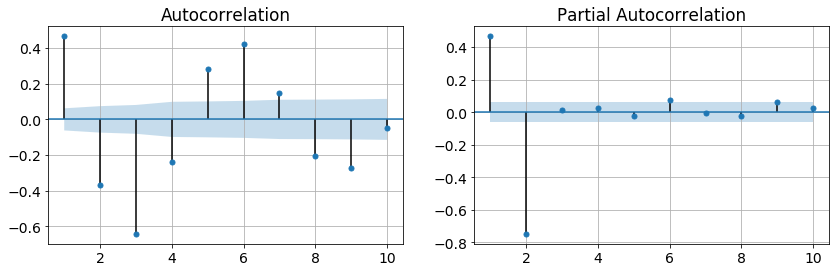

In [89]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

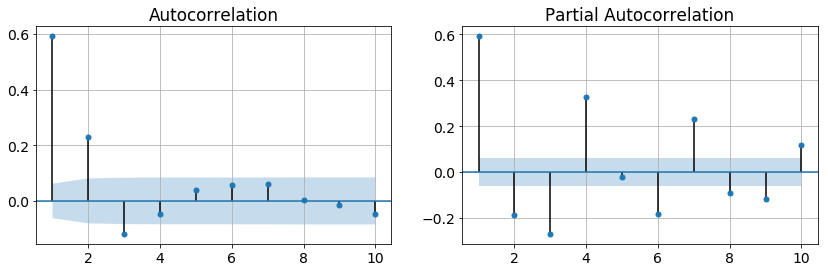

In [90]:
ar_coeffs = [1, 0] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.8]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

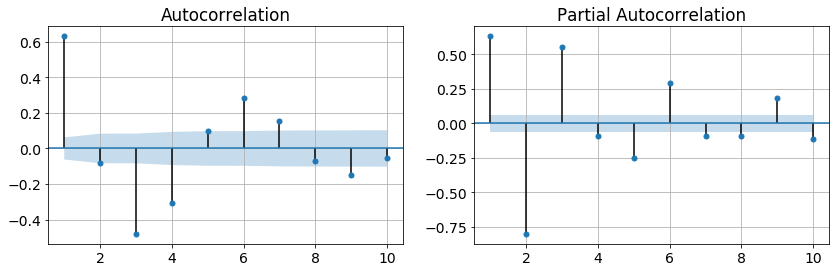

In [91]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

## If the model is ARMA we have to try different models to find the right one

In [92]:
from statsmodels.tsa.arima_model import ARMA

In [93]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)

In [94]:
model = ARMA(y, order=(2, 2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1403.637
Method:                       css-mle   S.D. of innovations              0.982
Date:                Sun, 15 Sep 2019   AIC                           2819.275
Time:                        22:26:33   BIC                           2848.721
Sample:                             0   HQIC                          2830.466
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1403      0.094      1.492      0.136      -0.044       0.325
ar.L1.y        0.7885      0.027     28.930      0.000       0.735       0.842
ar.L2.y       -0.6543      0.027    -24.610      0.000      -0.706      -0.602
ma.L1.y        0.9010      0.027     33.806      0.000       0.849       0.953
ma.L2.y        0.7193      0.023     30.886      0.000       0.674       0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6026           -1.0795j            1.2363           -0.1690
AR.2            0.6026           +1.0795j            1.2363            0.1690
MA.1           -0.6263           -0.9990j            1.1791           -0.3391
MA.2           -0.6263           +0.9990j            1.1791            0.3391
-----------------------------------------------------------------------------
"""

In [96]:
results.aic

2819.274738079302

In [97]:
%%time
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(4):
  # Loop over q values 
    for q in range(4):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(y, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))            

Wall time: 3.83 s


In [99]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
10,2,2,2819.274738,2848.721270
14,3,2,2820.634588,2854.988875
11,2,3,2820.740642,2855.094929
15,3,3,2822.289972,2861.552015
13,3,1,3022.696142,3052.142674


---

# Arma Model on ICICI

In [100]:
ic_resampled.tail()

Date
2019-01-06    363.3900
2019-01-13    377.6300
2019-01-20    373.6000
2019-01-27    366.0300
2019-02-03    355.1875
Freq: W-SUN, Name: close, dtype: float64

In [101]:
ic_resampled.diff().dropna().tail()

Date
2019-01-06     7.1400
2019-01-13    14.2400
2019-01-20    -4.0300
2019-01-27    -7.5700
2019-02-03   -10.8425
Freq: W-SUN, Name: close, dtype: float64

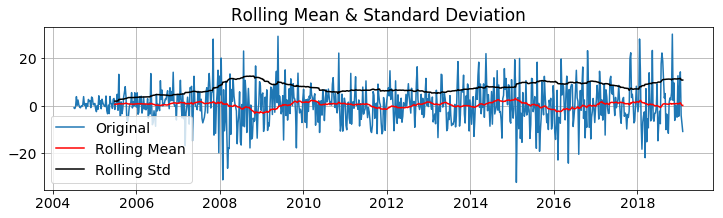

Results of Dickey-Fuller Test:
p_value:  0.0


In [102]:
test_stationarity(ic_resampled.diff().dropna())

In [104]:
%%time
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(ic_resampled.diff().dropna(), order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

Wall time: 12.3 s


In [107]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
23,4,3,5320.096201,5361.819720
1,0,1,5320.326583,5334.234422
5,1,0,5320.524204,5334.432044
10,2,0,5322.258449,5340.802235
2,0,2,5322.300350,5340.844137


In [108]:
model = ARMA(ic_resampled.diff().dropna(), order=(4, 3))
results = model.fit()

In [109]:
len(ic_resampled.diff().dropna())

762

In [112]:
ic_resampled.diff().tail()

Date
2019-01-06     7.1400
2019-01-13    14.2400
2019-01-20    -4.0300
2019-01-27    -7.5700
2019-02-03   -10.8425
Freq: W-SUN, Name: close, dtype: float64

In [110]:
results.predict(752, 765) # Generally in TSA models we use the min(order) as reliable days for future predictions

2018-12-02   -0.995333
2018-12-09   -0.805219
2018-12-16    0.060135
2018-12-23   -0.510638
2018-12-30    1.196480
2019-01-06    0.597047
2019-01-13    0.127664
2019-01-20    1.754508
2019-01-27    0.320109
2019-02-03   -2.324087
2019-02-10   -0.431112
2019-02-17    1.240328
2019-02-24   -0.506122
2019-03-03    1.179113
Freq: W-SUN, dtype: float64

In [115]:
results.forecast()

(array([-0.43111174]),
 array([7.82517729]),
 array([[-15.7681774 ,  14.90595392]]))

### The predictions are for differenced values. We would need to use cumsum to get to absolute predictions.  ARIMA can help us with this.

In [116]:
ic_resampled.tail(11)

Date
2018-11-25    357.2750
2018-12-02    357.4700
2018-12-09    352.9400
2018-12-16    348.1100
2018-12-23    360.7100
2018-12-30    356.2500
2019-01-06    363.3900
2019-01-13    377.6300
2019-01-20    373.6000
2019-01-27    366.0300
2019-02-03    355.1875
Freq: W-SUN, Name: close, dtype: float64

In [117]:
diff_preds = results.predict(752, 761)
diff_preds

Date
2018-12-02   -0.995333
2018-12-09   -0.805219
2018-12-16    0.060135
2018-12-23   -0.510638
2018-12-30    1.196480
2019-01-06    0.597047
2019-01-13    0.127664
2019-01-20    1.754508
2019-01-27    0.320109
2019-02-03   -2.324087
Freq: W-SUN, dtype: float64

In [118]:
cum_preds = 357.27+diff_preds.cumsum()
cum_preds

Date
2018-12-02    356.274667
2018-12-09    355.469448
2018-12-16    355.529584
2018-12-23    355.018946
2018-12-30    356.215426
2019-01-06    356.812473
2019-01-13    356.940137
2019-01-20    358.694645
2019-01-27    359.014755
2019-02-03    356.690667
Freq: W-SUN, dtype: float64

In [119]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(ic_resampled.tail(10), cum_preds))
print('Test RMSE: %.6f' % error)

Test RMSE: 9.166480


## Notes
* #### Generally predictions with TSA models are made for one day out
* #### ARMA models can act as one of the features in ML

---

# Lets create an ARIMA Model to predict EURO per USD  rates  on Dataset from Quandl

### Steps to follow:
* Is the dataset stationary? (adfuller)
* if not, what order of differencing will make it stationary (transform the data)
* What values of p and q lags would be best (Try ACF/PACF plots or AIC/BIC approach)
* Fit the model
* Check the results    

In [120]:
df_fx_data = pd.read_csv('BOE-XUDLERD.csv')
df_fx_data.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


## CONVERTING TO TIME SERIES DATA

In [121]:
ts = pd.read_csv('BOE-XUDLERD.csv', parse_dates=True, index_col='Date')
ts=ts[::-1]
ts.columns = ['e2u']
ts.head(5)

,e2u
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524
1975-01-07,0.7510
1975-01-08,0.7554


## VISUALIZE DATA

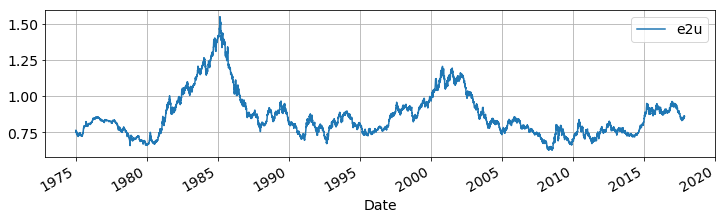

In [122]:
ts.plot()
plt.show()

## RESAMPLE DATA

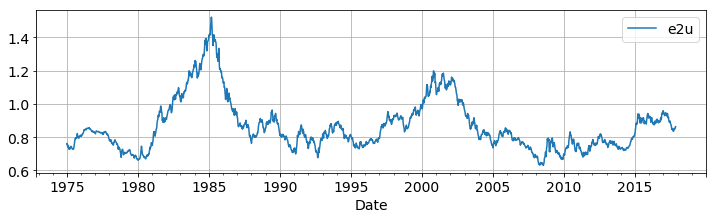

In [123]:
ts_week = ts.resample('W').mean()
ts_week.plot()
plt.show()

# Stationarity Check Using Dickey Fuller Test 

In [124]:
adfuller(ts_week.e2u)[1]

0.25413395509261316

# Convert Data Into Stationary Data

In [125]:
adfuller(ts_week.e2u.diff().dropna())[1]

0.0

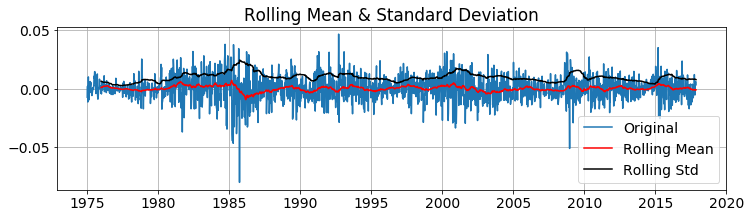

Results of Dickey-Fuller Test:
p_value:  0.0


In [126]:
ts_diff = ts_week.e2u.diff().dropna()
test_stationarity(ts_diff)

# Identify the p and q lags

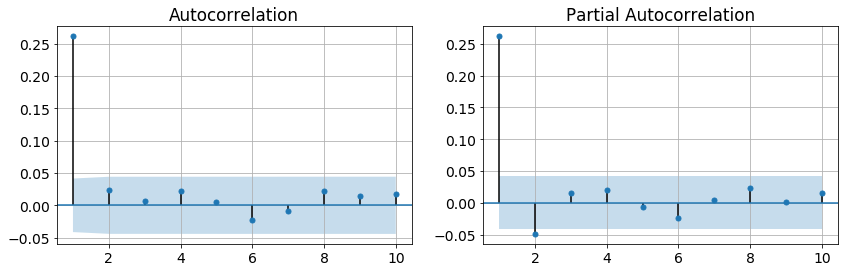

In [127]:
#ACF and PACF
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(ts_diff, lags=10, zero=False, ax=ax[0])
plot_pacf(ts_diff, lags=10, zero=False, ax=ax[1])
plt.show()

In [128]:
from statsmodels.tsa.arima_model import ARIMA

In [130]:
%%time
order_aic_bic=[]
# Loop over p values 
for p in range(4):
  # Loop over q values 
    for q in range(4):
      	# create and fit ARIMA(p,1,q) model
        try:
            model = ARIMA(ts_week.e2u.values, order=(p,1, q)) # Notice we are passing ts_week not ts_week.diff()
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))
        

Wall time: 16.8 s


In [132]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
1,0,1,-14200.383815,-14183.246484
4,1,0,-14196.130907,-14178.993575
2,0,2,-14199.739866,-14176.890090
5,1,1,-14199.712057,-14176.862282
8,2,0,-14199.447889,-14176.598114


In [133]:
order_final = (3,1,3)

# ARIMA Model Implementation

In [134]:
model = ARIMA(ts_week.e2u, order=order_final)  
results_ARIMA = model.fit()

In [135]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.e2u   No. Observations:                 2236
Model:                 ARIMA(3, 1, 3)   Log Likelihood                7112.385
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sun, 15 Sep 2019   AIC                         -14208.769
Time:                        23:03:08   BIC                         -14163.070
Sample:                    01-12-1975   HQIC                        -14192.084
                         - 11-12-2017                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.435e-05      0.000      0.159      0.874      -0.001       0.001
ar.L1.D.e2u    -0.1441      0.084     -1.711      0.087      -0.309       0.021
ar.L2.D.e2u    -0.9482      0.026    -35.915      0.000      -1.000      -0.896
ar.L3.D.e2u     0.1456      0.082      1.779      0.075      -0.015       0.306
ma.L1.D.e2u     0.4203      0.085      4.971      0.000       0.255       0.586
ma.L2.D.e2u     1.0195      0.031     32.933      0.000       0.959       1.080
ma.L3.D.e2u     0.1197      0.082      1.453      0.146      -0.042       0.281
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1468           -0.9938j            1.0045           -0.2733
AR.2           -0.1468           +0.9938j            1.0045            0.2733
AR.3            6.8073           -0.0000j            6.8073           -0.0000
MA.1           -0.1518           -0.9970j            1.0085           -0.2740
MA.2           -0.1518           +0.9970j            1.0085            0.2740
MA.3           -8.2116           -0.0000j            8.2116           -0.5000
-----------------------------------------------------------------------------
"""

# Prediction Using ARIMA Model

In [ ]:
len(ts_week.e2u)

In [137]:
ts_week.e2u.tail()

Date
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: e2u, dtype: float64

In [138]:
results_ARIMA.predict(2232, 2240)

2017-10-15    0.001379
2017-10-22   -0.001883
2017-10-29    0.000176
2017-11-05    0.001876
2017-11-12    0.001856
2017-11-19    0.000103
2017-11-26   -0.000196
2017-12-03    0.000654
2017-12-10    0.000193
Freq: W-SUN, dtype: float64

In [136]:
results_ARIMA.forecast()

(array([0.86270289]), array([0.01005285]), array([[0.84299966, 0.88240612]]))

#### Making Rolling Forecasts for multiple days, by training the model in a loop

In [ ]:
%%time
predictions = []
for x in np.arange(-2, 0):
    try:
        model = ARIMA(ts_week.e2u.iloc[:x], order=order_final)  
        results_ARIMA = model.fit()
        predictions.append(list(results_ARIMA.forecast()[0])[0])        
    except:
        predictions.append(np.NaN) 

In [ ]:
predictions=np.array(predictions)
predictions

In [ ]:
actual = ts_week.e2u.tail(2)
actual

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(actual, predictions)
print('Test MSE: %.6f' % error)

---

### __Topics you can Explore further:__
* ### Arimax models
* ### Seasonal models of ARIMA